# Composite and rotated gores #
This notebook demonstrates three of the improvements suggested by William, namely:


- Use of a "no-cut zone" between gores, so that the gores are connected by a strip to avoid fiddly cutting;
- connecting the gores using a rotary pattern, i.e. joining them at the pole (again with a no-cut option for ease of cutting)
- handling composite images, such as the Zeiss example.

## Examples with the fundus image from last time ##
Import `gore` module and other utilities

In [1]:
import gore
from PIL import Image
from math import pi
import matplotlib.pyplot as plt

In [2]:
def fig(img):
    plt.figure(figsize = (10,10))
    plt.imshow(img)
    plt.show()

Map the image to position in the eye using the simple eye model and get its angular size.

100%|██████████| 999/999 [00:16<00:00, 61.31it/s]


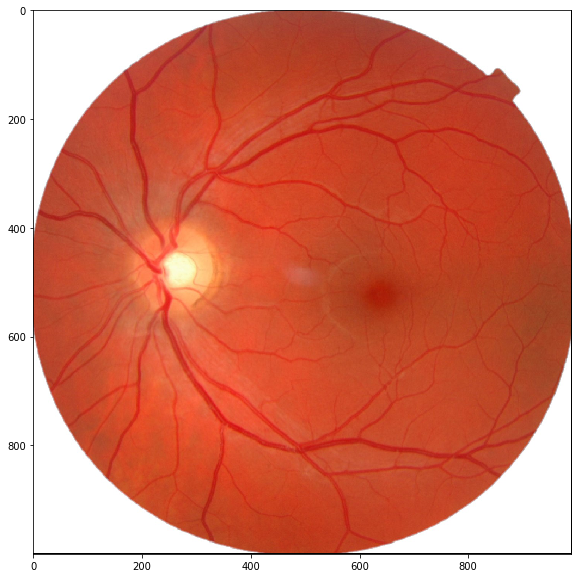

In [3]:
fundus = gore.openimage('../media/fundus_white.jpg')
mm_per_px = 1.92 / 200 # approximated using the optic disc
fundus_image, lammax, phimax = gore.equi_zeiss(fundus, mm_per_px)
fig(fundus_image)

Produce a set of gores with a no-cut zone at the equator, made using a simple cylindrical projection (Lambert cylindrical equal-area) .

100%|██████████| 1000/1000 [00:03<00:00, 263.78it/s]


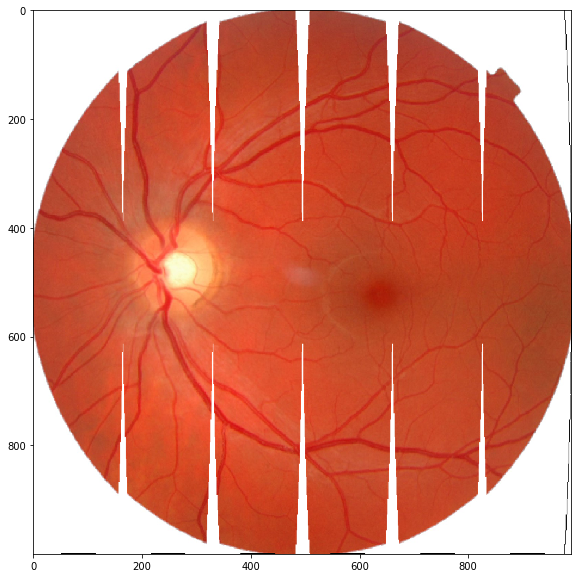

In [4]:
fundus_gores = gore.make(fundus_image, num_gores = 6, projection="cassini", 
                         phi_min = -phimax, phi_max = phimax, lam_min = -lammax, 
                         lam_max = lammax, phi_no_cut = pi / 24)
fig(fundus_gores)
fundus_gores.save("fundus_gores.png")

Produce a set of gores joined at the pole. Until now the centre of the fundus image has been centred on the equator of our map of the eye; the function that creates the rotary pattern of gores expects the region of interest to be centred at the "north" pole, so we use the function `swap` to rotate our map of the eye so that it is correctly oriented.

100%|██████████| 1000/1000 [00:04<00:00, 222.28it/s]


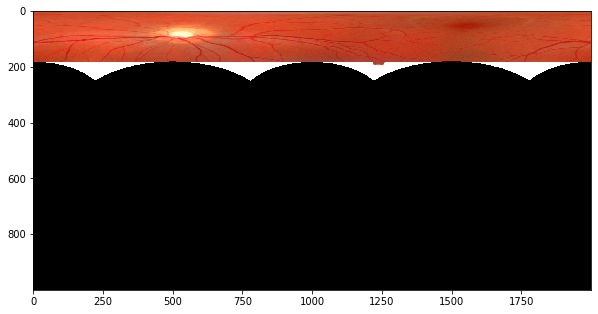

100%|██████████| 1000/1000 [00:08<00:00, 124.35it/s]


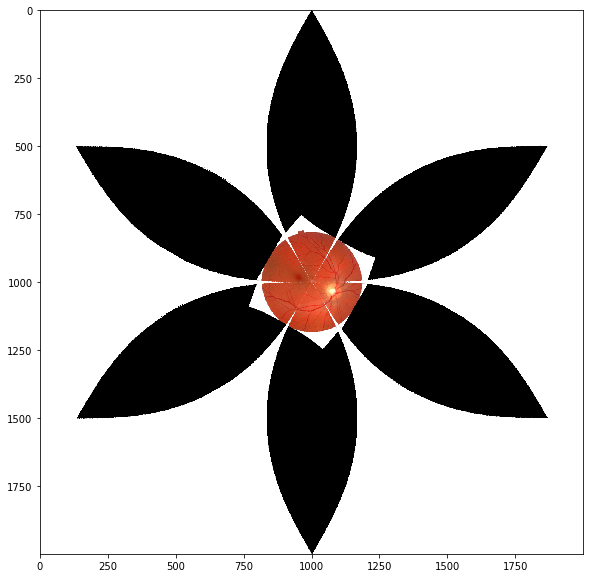

In [5]:
fundus_swapped = gore.swap(fundus_image, phi_extent = phimax, lam_extent = lammax)
fig(fundus_swapped)
fundus_rotary = gore.make(fundus_swapped, num_gores = 6, 
                          projection="cassini", pole_stitch=True)
fundus_rotary.save("fundus_rotary.png")
fig(fundus_rotary)

Finally, produce a polar cap using a simple projection (azimuthal equidistant) that can be pasted on to the rotary gores, so that there is a region in the centre where no cutting is required.

100%|██████████| 1000/1000 [00:04<00:00, 210.90it/s]


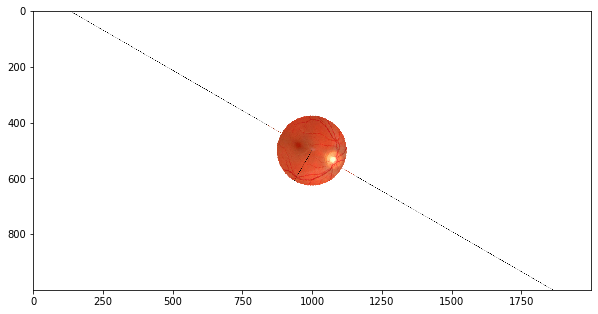

In [6]:
fundus_cap = gore.polecap(fundus_swapped, num_gores=6, phi_cap = pi / 8)
fundus_cap.save("fundus_cap.png")
fig(fundus_cap)

### Final image with rotary gores and polar cap ###

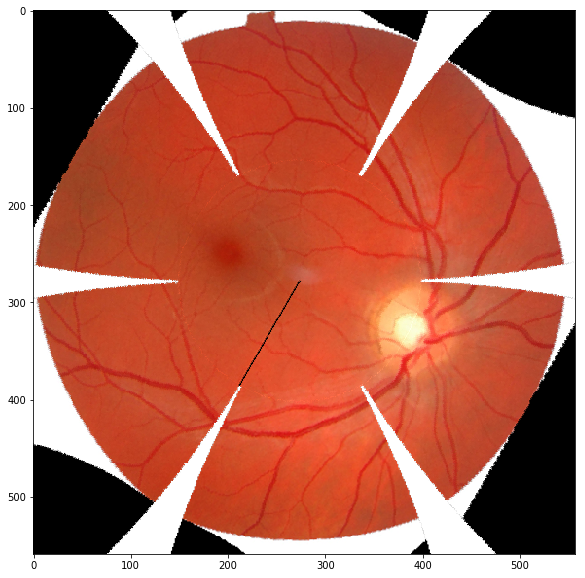

In [7]:
fundus_final = gore.openimage("fundus_rotary_with_cap.png")
fig(fundus_final)

## Zeiss composite image example ##

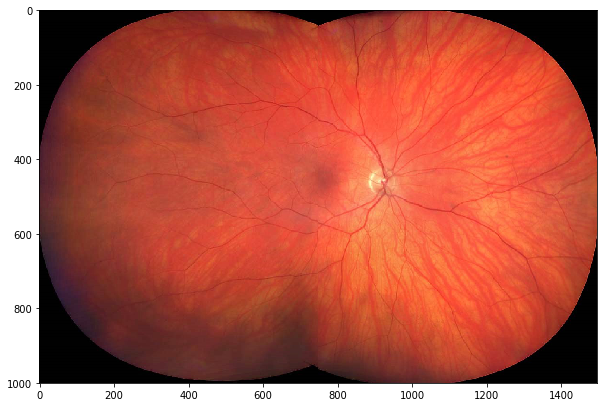

In [8]:
zeiss = gore.openimage('../media/Zeiss.jpg')
mm_per_px = 1.92 / 55 # approximated using the optic disc
zeiss_image, lammax, phimax = gore.equi_zeiss(zeiss, mm_per_px)
fig(zeiss_image)

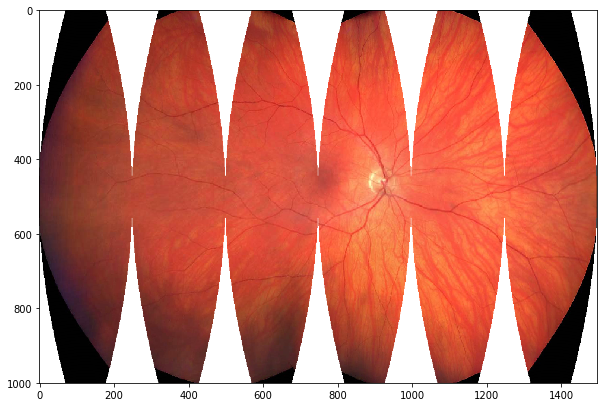

In [9]:
zeiss_gores = gore.make(zeiss_image, num_gores = 6, projection="cassini", 
                        phi_min = -phimax, phi_max = phimax, lam_min = -lammax, 
                        lam_max = lammax, phi_no_cut = pi / 24)
fig(zeiss_gores)
zeiss_gores.save("zeiss_gores.png")

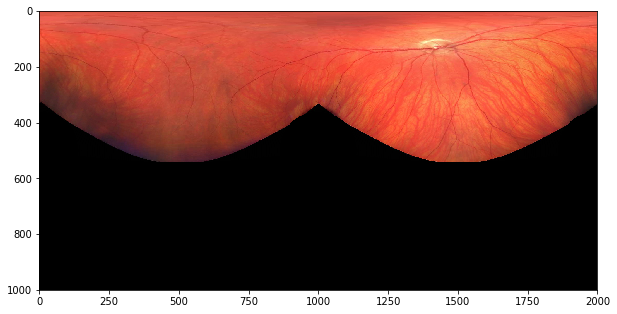

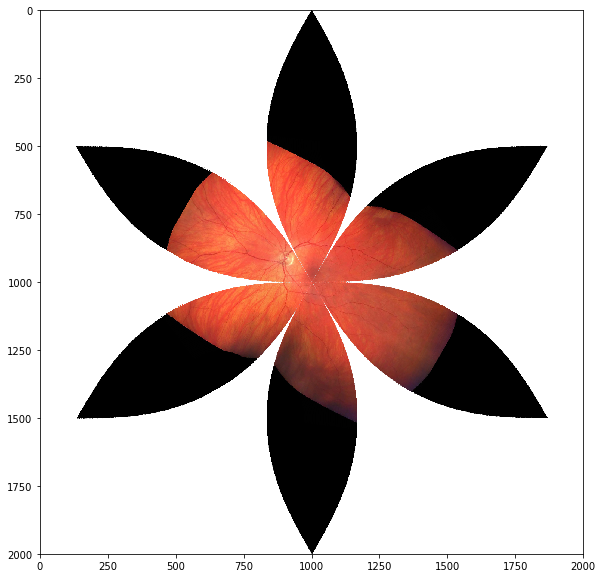

In [10]:
zeiss_swapped = gore.swap(zeiss_image, phi_extent = phimax, lam_extent = lammax)
fig(zeiss_swapped)
zeiss_rotary = gore.make(zeiss_swapped, num_gores = 6, 
                         projection="cassini", pole_stitch=True)
zeiss_rotary.save("zeiss_rotary.png")
fig(zeiss_rotary)

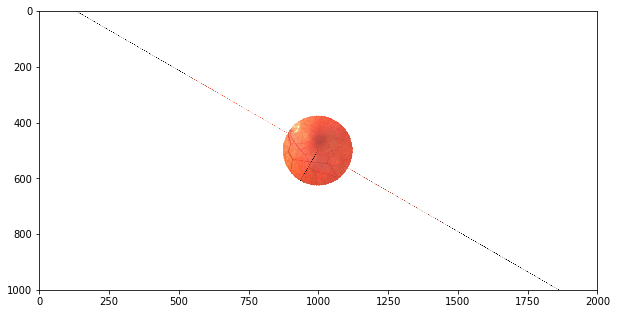

In [11]:
zeiss_cap = gore.polecap(zeiss_swapped, num_gores=6, phi_cap = pi / 8)
zeiss_cap.save("zeiss_cap.png")
fig(zeiss_cap)

### Final image: rotary gores with polar cap ###

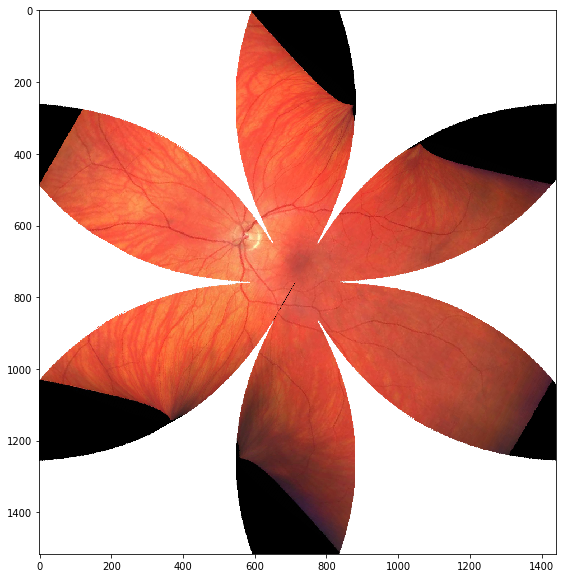

In [12]:
zeiss_final = gore.openimage("zeiss_rotary_with_cap.png")
fig(zeiss_final)

The geometry of the outline of this particular creation looks a little suspect until you put it together...

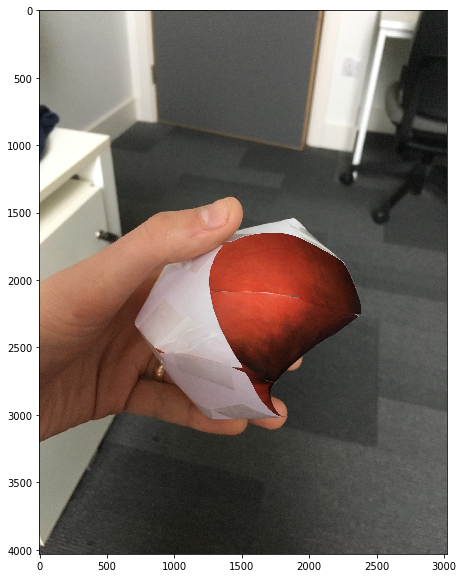

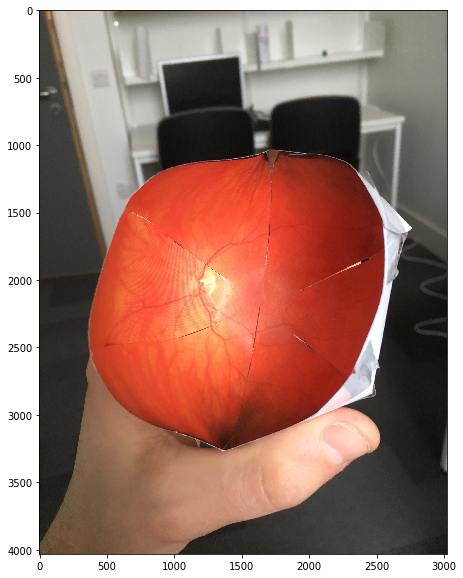

In [13]:
im1 = gore.openimage("../media/zeiss_finished.JPG")
im2 = gore.openimage("../media/zeiss_finished2.JPG")
fig(im1)
fig(im2)